In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Operations on matrices

In [ ]:
arr = np.array([[2,3],
              [2,2]])

print(np.linalg.inv(arr), '\n') # inverse matrix
print(np.linalg.det(arr), '\n') # determinant

X =np.array([[1,-1,1,-1,0,0,0],[1,0,0,0,0,0,0],[1,1,1,1,1,0,0],[1,2,4,8,8,1,0],[1,3,9,27,27,8,1],[0,1,-2,3,0,0,0],[0,1,6,9,27,12,3]])
B = np.array([1,-1,-2,0,-1,1,1]).T
np.linalg.solve(X, B)

[[-1.   1.5]
 [ 1.  -1. ]] 

-2.0 



array([ -1.        ,  -3.37837838,   0.24324324,   1.62162162,
         0.51351351, -10.2972973 ,  32.67567568])

In [ ]:
A = np.array([[1/5,0,0],[0,-1/4,0],[0,0,-1/4]])
B = np.array([[0,4,1],[1,0,-1],[1,-1,0]])
(-A@B)@(np.array([1,1,1]).T)

array([-1.,  0.,  0.])

# Lagrange interpolation

In [ ]:
x_s = np.array([-2,2,3])
y_s = np.array([1,0,1])

x0 = 2.5

In [ ]:
def interpolate(x,size):
  total = 0
  for i in range (size):
    res = 1
    for j in range (size):
      if i == j:
         continue
      res *= (x-x_s[j])/(x_s[i]-x_s[j])
    total += y_s[i] * res
  return total  

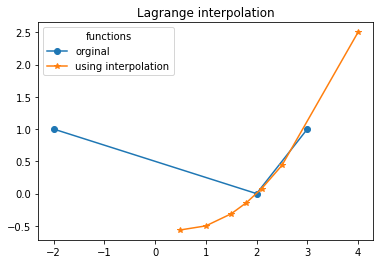

Interpolated value at 2.5 equals 0.4375


In [ ]:
my_x = np.array([0.5, 1, 1.5, 1.8, 2.1, 2.5, 4])
my_y = np.zeros(len(my_x))

for i in range(len(my_x)):
  my_y[i] = interpolate(my_x[i], len(x_s))

plt.plot(x_s,y_s, marker='o', label="orginal" )
plt.plot(my_x, my_y, marker='*', label="using interpolation")

plt.title('Lagrange interpolation')
plt.legend(title='functions')
plt.show()

print('Interpolated value at', x0, "equals", interpolate(x0,len(x_s)))

# Fourrier transform

In [ ]:
a = np.array([3,0,4,-1,1,7,-2,-3])
res = np.fft.fft(a) 
for x in res:
  print(x)

(9+0j)
(-4.363961030678928-2.4644660940672622j)
(2-11j)
(8.363961030678928+9.535533905932738j)
(3+0j)
(8.363961030678928-9.535533905932738j)
(2+11j)
(-4.363961030678928+2.4644660940672622j)


# Numerical differentiation

In [ ]:
x0 = 1
h = 0.5
h2 = 0.1

- first order derivative (three-point formula)

In [ ]:
def der1_points3(x, h, fun):
  return (fun(x+h) - fun(x-h))/(2*h)

print(der1_points3(x0, 0.2, lambda x: 2 * x**2))

3.999999999999999


- first order derivative (five-point formula)

In [ ]:
def der1_points5(x, h, fun):
  return 1/(12*h) * (fun(x-2*h) - 8*fun(x-h) + 8*fun(x+h) - fun(x+2*h))

print(der1_points5(1, 2, lambda x: -2 * x**3))
print(der1_points5(1, 0.1, lambda x: -2 * x**3))

-6.0
-6.000000000000004


- second order derivative (three-point formula)

In [ ]:
def der2_points3(x, h, fun):
  return (fun(x+h) - 2*fun(x) + fun(x-h))/h**2

print(der2_points3(x0, h, lambda x: 3 * x**3))

18.0


- second order derivative (five-point formula)


In [ ]:
def der2_points5(x, h, fun):
  return 1/(12*h**2) * (-fun(x-2*h) + 16*fun(x-h) - 30*fun(x) + 16*fun(x+h) - fun(x+2*h)) ####or 1/14

print(der2_points5(x0, h, lambda x: 3 * x**3))

18.0


# Numerical integration

In [ ]:
a = 0
b = 10
h = 1

- rectangular


In [ ]:
def num_integral_rec(a, b, h, fun):
  sum = 0
  n = int((b - a) / h)
  for i in range(n): #from 1 to n-1
    sum += fun(a)
    a += h
  sum *= h
  return sum

result = num_integral_rec(a, b, h, lambda x: x**2)
print(result)

285


- trapezoidal

In [ ]:
def num_integral_trap(a, b, h, fun):
  sum = 0;
  n = int((b - a) / h)
  x = a + h #starting from x1 
  for i in range(1, n):
    sum += fun(x)
    x += h
  sum *= h
  sum += (h * (fun(a) + fun(b)))/2
  return sum

print(num_integral_trap(0, 12, 3, lambda x:3*x))

216.0


# Non-Linear Equations

### Bisection



In [ ]:
def bisection(a, b, eps, fun):
  if fun(a) * fun(b) > 0:
      print("error")
      return
  i = 0 
  while i < 20: #for example 20 is max number of iterations
    x = (a+b)/2
    print("%2d | %5.5f | %5.5f" %(i+1,x, fun(x)))
    if(abs(fun(x)) < eps):
      print("Smaller than eps, x=", x)
      return
    if fun(a) * fun(x) < 0:
      b = x
    else:
      a = x
    i+=1

In [ ]:
bisection(0,8,0.1,lambda a: a**2 - 3)

 1 | 4.00000 | 13.00000
 2 | 2.00000 | 1.00000
 3 | 1.00000 | -2.00000
 4 | 1.50000 | -0.75000
 5 | 1.75000 | 0.06250
Smaller than eps, x= 1.75


### Regula falsi (secants)

In [ ]:
def regula_falsi(a, b, eps, fun):
  if fun(a) * fun(b) > 0:
      print("error")
      return
  i = 0
  while i < 20:
    x = a - fun(a) / (fun(b) - fun(a)) * (b - a)
    print("%2d | %5.5f | %5.5f" %(i+1,x, fun(x)))
    if abs(fun(x)) < eps:
      print("Smaller than eps, x=", x)
      return
    if fun(a) * fun(x) < 0:
      b = x
    else:
      a = x
    i+=1

#funkcja = lambda 2 * np.cos(x/3) - x**2/2
regula_falsi(0,8,0.1,lambda a: a**2 -3)

 1 | 0.37500 | -2.85938
 2 | 0.71642 | -2.48675
 3 | 1.00171 | -1.99657
 4 | 1.22351 | -1.50302
 5 | 1.38647 | -1.07771
 6 | 1.50128 | -0.74615
 7 | 1.57981 | -0.50419
 8 | 1.63244 | -0.33513
 9 | 1.66724 | -0.22033
10 | 1.69003 | -0.14381
11 | 1.70487 | -0.09343
Smaller than eps, x= 1.7048675615286526


### Newton method (tangents)

In [ ]:
def tangent_meth(x, eps, fun):
  i = 0
  while abs(fun(x)) > eps or i > 20 :
    print("%d | %5.5f | %5.5f" %(i+1,x, fun(x)))
    der = (fun(x + eps) - fun(x))/eps
    x0 = x - fun(x)/der
    x = x0
    i+=1
  return x

print(tangent_meth(4, 0.1, lambda a: a**2 - 3))
print(tangent_meth(0.5, 0.1, lambda a: a**2 - 3))
print(tangent_meth(8, 0.1, lambda a: a**2 - 3))

print("result", math.sqrt(3))


1 | 4.00000 | 13.00000
2 | 2.39506 | 2.73632
3 | 1.83550 | 0.36906
1.7376320783730383
1 | 0.50000 | -2.75000
2 | 3.00000 | 6.00000
3 | 2.01639 | 1.06584
1.7584942223031461
1 | 8.00000 | 61.00000
2 | 4.21118 | 14.73404
3 | 2.48231 | 3.16187
4 | 1.85801 | 0.45219
1.7395089525230754
result 1.7320508075688772


exercises

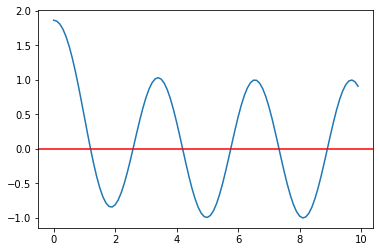

left end: 1.5
right end: 4
Bisection
 1 | 2.75000 | 0.32488
 2 | 2.12500 | -0.71438
 3 | 2.43750 | -0.26582
 4 | 2.59375 | 0.02627
 5 | 2.51562 | -0.12250
 6 | 2.55469 | -0.04856
 7 | 2.57422 | -0.01123
 8 | 2.58398 | 0.00751
Smaller than eps, x= 2.583984375
Regula falsi
 1 | 2.98231 | 0.71653
 2 | 2.15266 | -0.68585
 3 | 2.55841 | -0.04146
 4 | 2.58160 | 0.00292
Smaller than eps, x= 2.58159541756971
Tangent
1 | 2.75000 | 0.32488


2.5754950014350086

In [ ]:
y = lambda x: math.exp(-x) + math.sin(2*x + math.pi/3)

#plotting
x_s = np.arange(0, 10, 0.1)
y_s = np.exp(-x) + np.sin(2*x + np.pi/3)
plt.plot(x_s, y_s)
plt.axhline(0, color="red")
plt.show()

a = float(input("left end: "))
b = float(input("right end: "))

print("Bisection")
bisection(a,b,0.01,y)
print("Regula falsi")
regula_falsi(a,b,0.01,y)
print("Tangent")
tangent_meth((a+b)/2,0.01,y)


# Differential equations

- Euler method

In [ ]:
def diff_eq_Euler(max, x0, y0, h, fun):
  print("i\tx\ty")
  for i in range(max):
    print(i,"\t",x0,"\t",y0)
    y1 = y0 + h * fun(x0,y0)
    y0 = y1
    x0 += h

diff_eq_Euler(5, 1, 2, 1, lambda a, b: a/b)

i	x	y
0 	 1 	 2
1 	 2 	 2.5
2 	 3 	 3.3
3 	 4 	 4.209090909090909
4 	 5 	 5.159414883172983


- trapezoids method

In [ ]:
def diff_eq_trap(max, x0, y0, h, fun):
  print("i\tx\ty")
  for i in range(max):
    print(i,"\t",x0,"\t",y0)
    y1 = y0 + h/2 * (fun(x0,y0) + fun(x0+h, y0 + h * fun(x0,y0)))
    y0 = y1
    x0 += h

diff_eq_trap(5, 1, 2, 1, lambda a, b: a/b)

i	x	y
0 	 1 	 2
1 	 2 	 2.65
2 	 3 	 3.467923744098872
3 	 4 	 4.362033741574454
4 	 5 	 5.29410667174338


- Runge-Kutta

In [ ]:
def diff_eq_RK(max, x0, y0, h, fun):
  print("%2s\t%8s\t%8s\t%8s\t%8s\t%8s\t%8s" %("i", "x", "k1", "k2", "k3", "k4", "y"))
  print(" 0\t  ",x0,"\t\t\t\t\t\t\t\t\t\t  ",y0)
  for i in range(max):
    k1 = h * fun(x0, y0)
    k2 = h * fun(x0 + 1/2*h, y0 + 1/2*k1)
    k3 = h * fun(x0 + 1/2*h, y0 + 1/2*k2)
    k4 = h * fun(x0 + h, y0 + k3)
    y1 = y0 + 1/6 * (k1 + 2*k2 + 2*k3 + k4)
    y0 = y1
    x0 += h
    print("%2d\t%8.3f\t%8.3f\t%8.3f\t%8.3f\t%8.3f\t%8.3f" %(i+1, x0, k1, k2, k3, k4, y0))


diff_eq_RK(10, 1, 2, 1, lambda a, b: a/b)

 i	       x	      k1	      k2	      k3	      k4	       y
 0	   1 										   2
 1	   2.000	   0.500	   0.667	   0.643	   0.757	   2.646
 2	   3.000	   0.756	   0.827	   0.817	   0.866	   3.464
 3	   4.000	   0.866	   0.898	   0.894	   0.918	   4.359
 4	   5.000	   0.918	   0.934	   0.932	   0.945	   5.292
 5	   6.000	   0.945	   0.954	   0.953	   0.961	   6.245
 6	   7.000	   0.961	   0.966	   0.966	   0.971	   7.211
 7	   8.000	   0.971	   0.974	   0.974	   0.977	   8.185
 8	   9.000	   0.977	   0.980	   0.980	   0.982	   9.165
 9	  10.000	   0.982	   0.984	   0.984	   0.985	  10.149
10	  11.000	   0.985	   0.987	   0.987	   0.988	  11.136


- Adams-Bashforth

In [ ]:
#_1 meaning one step backwards, _2 two steps backwards ...
def AB1(h, x_1, y_1, y_2, fun): 
  return y_1 + h/2 * (-fun(x_1-h, y_2) + 3*fun(x_1,y_1))

def AB2(h, x_1, y_1, y_2, y_3, fun):
  return y_1 + h/12 * (5*fun(x_1-2*h, y_3) - 16*fun(x_1-h,y_2) + 23*fun(x_1,y_1))

def AB3(h, x_1, y_1, y_2, y_3, y_4, fun):
  return y_1 + h/24 * (-9*fun(x_1-3*h, y_4) + 37*fun(x_1-2*h,y_3) - 59*fun(x_1-h,y_2) + 55*fun(x_1,y_1))

def AB4(h, x_1, y_1, y_2, y_3, y_4, y_5, fun): 
  return y_1 + h/720 * (251*fun(x_1-4*h,y_5) - 1274*fun(x_1-3*h,y_4) + 2616*fun(x_1-2*h,y_3) - 2774*fun(x_1-h, y_2) + 1901*fun(x_1,y_1))

exercise

In [ ]:
#zadanie
diff_eq_RK(2, 1, 2, 1, lambda a, b: a/b)

#biore 2 wartosci y z metody Rungego-Kutty a potem podstawian do AB, gdzie przekazuje jako x_1 zawsze poprzedzajacy o 1 x
#czyli dla obliczania y1 daje x0 dla obliczania y2 daje x1 ... dla y5 x4 itd.
x3 = 4
y3 = AB2(1,3,3.465,2.646,2,lambda a,b: a/b)
print("y3 =",y3)

x4 = 5
y4 = AB2(1,x3,4.325,3.465,2.646,lambda a,b: a/b)
print("y4 =", y4)

 i	       x	      k1	      k2	      k3	      k4	       y
 0	   1 										   2
 1	   2.000	   0.500	   0.667	   0.643	   0.757	   2.646
 2	   3.000	   0.756	   0.827	   0.817	   0.866	   3.464
y3 = 4.3249744611649374
y4 = 5.25817932844495


- Adams-Moulton

In [ ]:
def AM1(h, x, y, y_1, fun):
  return y_1 + h/2 * (fun(x-h, y_1) + fun(x, y))

def AM2(h, x, y, y_1, y_2, fun):
  return y_1 + h/12 * (-fun(x-2*h,y_2) + 8*fun(x-h, y_1) + 5*fun(x, y))

def AM3(h, x, y, y_1, y_2, y_3, fun):
  return y_1 + h/24 * (-fun(x-3*h, y_3) -5*fun(x-2*h,y_2) - 19*fun(x-h, y_1) + 9*fun(x, y))

def AM4(h, x, y, y_1, y_2, y_3, y_4, fun):
  return y_1 + h/720 * (-19*fun(x-4*h, y_4) + 106*fun(x-3*h, y_3) - 264*fun(x-2*h,y_2) + 646*fun(x-h, y_1) + 251*fun(x, y))  

exercise

In [ ]:
#zadanie
diff_eq_RK(4, 1, 2, 1, lambda a, b: a/b)

#tu daje jako x i y te ktore wyszly w tym samym i w Runge-Kutt a potem y_1 to ten o 1 mniejszy itp. Dopisuje z przodu, usuwam z tyłu wartość
y2 = AM2(1,3,3.464,2.646,2,lambda a,b: a/b)
print("y2 =", y2)

y3 = AM2(1,4,4.359,3.464,2.646,lambda a,b: a/b)
print("y3 =", y3)

y4 = AM2(1,5,5.192,4.359,3.464,lambda a,b: a/b)
print("y4 =", y4)


 i	       x	      k1	      k2	      k3	      k4	       y
 0	   1 										   2
 1	   2.000	   0.500	   0.667	   0.643	   0.757	   2.646
 2	   3.000	   0.756	   0.827	   0.817	   0.866	   3.464
 3	   4.000	   0.866	   0.898	   0.894	   0.918	   4.359
 4	   5.000	   0.918	   0.934	   0.932	   0.945	   5.292
y2 = 3.469093102607564
y3 = 4.360729739371225
y4 = 5.299848552768364


In [ ]:
#zadanie
x0 = 2
y0 = 3
max = 5
f = lambda x,y: 2*x+y
print("Euler")
#od 2 do 6 z krokiem h=1
diff_eq_Euler(9,2,3,1,f)
print("trapezy")
diff_eq_trap(9,2,3,1,f)
print("Runge-Kutta")
diff_eq_RK(8,2,3,1,f)

Euler
i	x	y
0 	 2 	 3
1 	 3 	 10
2 	 4 	 26
3 	 5 	 60
4 	 6 	 130
5 	 7 	 272
6 	 8 	 558
7 	 9 	 1132
8 	 10 	 2282
trapezy
i	x	y
0 	 2 	 3
1 	 3 	 14.5
2 	 4 	 46.25
3 	 5 	 128.625
4 	 6 	 337.5625
5 	 7 	 862.90625
6 	 8 	 2179.265625
7 	 9 	 5473.1640625
8 	 10 	 13710.91015625
Runge-Kutta
 i	       x	      k1	      k2	      k3	      k4	       y
 0	   2 										   3
 1	   3.000	   7.000	  11.500	  13.750	  22.750	  16.375
 2	   4.000	  22.375	  34.562	  40.656	  65.031	  56.016
 3	   5.000	  64.016	  97.023	 113.527	 179.543	 166.792
 4	   6.000	 176.792	 266.188	 310.887	 489.679	 470.229
 5	   7.000	 482.229	 724.344	 845.401	1329.630	1295.454
 6	   8.000	1309.454	1965.181	2293.045	3604.499	3533.855
 7	   9.000	3549.855	5325.782	6213.746	9765.601	9599.607
 8	  10.000	9617.607	14427.410	16832.312	26451.918	26031.101


# Gold-section search

In [ ]:
def gold(a,b,k,f):
  xL = b-(b-a)*k
  xR = a+(b-a)*k
  while b-a>0.1:
    if f(xL) > f(xR):
      a=xL
      xL=xR
      xR=a+(b-a)*k
    else: #xL > xR
      b=xR
      xL=b-(b-a)*k
      xR=xL
  print(xL, f(xL))
  print(xR, f(xR))

gold(0,4,0.612,lambda a: a**2+5)

0.021526332363915268 5.000463382985042
0.021526332363915268 5.000463382985042


.

In [74]:
cd "drive/My Drive/Colab Notebooks"

/content/drive/My Drive/Colab Notebooks


In [75]:
!ls

 avocado
 ColabDriveHitHub.ipynb
'Copy of KoronaScience3_template (1).ipynb'
'Copy of KoronaScience3_template.ipynb'
'Copy of KoronaScienceDay1.ipynb'
'Copy of NumericalMethods.ipynb'
'Copy of tf_keras.ipynb'
'Copy of transfer_learning_example.ipynb'
 dw_matrix
 interpolacjastara.ipynb
 NumericalMethods.ipynb


In [ ]:
!git init

In [ ]:
!git config --global user.email "thortineoc@gmail.com"
!git config --global user.name "thortineoc"

In [ ]:
!git add 

In [ ]:
!git commit -m "first commit"

In [ ]:
#!git remote rm origin

In [ ]:
!git push -u origin master

Counting objects: 27, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (27/27), 8.42 MiB | 2.06 MiB/s, done.
Total 27 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), done.
To https://github.com/thortineoc/numerical-methods.git
 * [new branch]      master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
